# Линейная регрессия

## 1. Поиск градиента

Продолжить формулу для взятия векторной производной по х для функции квадрата ошибки <br>(в красивом формате со всеми значками угловых скобок, операторов и т. д.). После выполнения этого вы вспомните формулу градиента для квадратичной ошибки и поймете как писать формулы на языке математической верстки TeX

$$ f(x) = ||Ax-y||^2 = (Ax-y)^T(Ax-y) $$
$$ D_f(x) = <Ax-y,Ax-y> = <Ax-y,d(Ax-y)> + <d(Ax-y),Ax-y> = 2<Ax-y,d(Ax-y)> = 2<Ax-y,Adx> = 2(Ax-y)^TAdx =  $$
$$=2(A^T(Ax-y))^Tdx = <2A^T(Ax-y),dx>=<2A^T(Ax-y),\Delta x> $$
$$ \nabla f(x) = 2A^T(Ax-y) $$

## 2. Прямое решение через ноль производной

После пункта 1 у вас есть формула для градиента квадратичной функции ошибки. Она измеряет уровень "неверности" решения (вектора $\vec{x}$). Теперь её надо приравнять к 0 и построить формулу, чтобы узнать при каком x это происходит.

$$ \nabla f(x) = 2A^T(Ax-y)  = 0$$
$$ 2A^TAx-2A^Ty=0$$
$$ A^TAx=A^Ty$$
$$ x =  (A^TA)^{-1}A^Ty$$

### 2.1 Реализация прямого решения

In [1]:
import numpy as np
import matplotlib.pyplot as plt

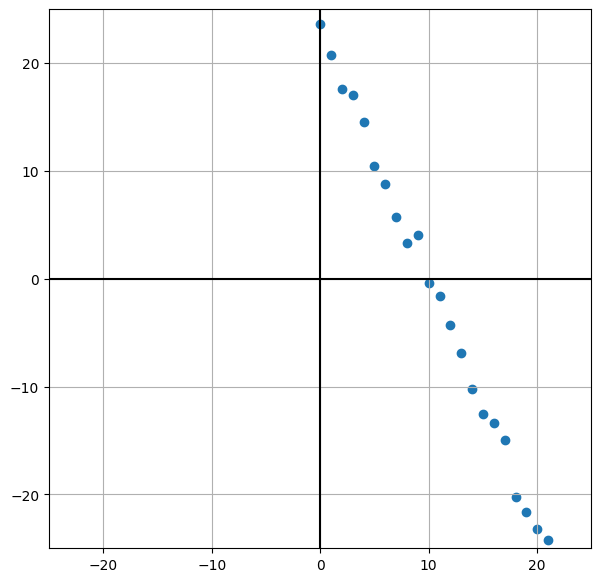

In [2]:
# ваши параметры по вариантам
n = 23
a_orig = (-1)**n * 0.1 * n # по формуле (-1)^n * 0.1 * n, n - номер в списке группы
b_orig = n*(-1)**(n+1) # по формуле n*(-1)^(n+1), где n - номер в списке группы
x = 23
random_state = x # х, где х - номер в списке группы

# это тот самый столбец который мы и должны отыскать будем нашими методами.
# сейчас конечно мы его знаем наперед потому что нам надо создать данные
# но в жизни мы изначально этих чисел не знаем и в жизни задача в том чтобы их найти
x_orig = np.array([a_orig, b_orig])

np.random.seed(random_state)

A = np.stack([np.arange(0, 25), np.ones(25)]).T

# @ - операция матричного умножения в библиотеке NumPy
y = A @ x_orig + np.random.standard_normal(25)
# добавили нормально распределённого шума в данных
# этим система станет несовместна для обычного решения

f, ax = plt.subplots(figsize=(7, 7))

# A[:, 0] - выбрать первый столбец, A[0, :] - выбрать первую строку
plt.scatter(A[:, 0], y)

ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
# рисуем координатные оси
ax.axvline(0, color="black")
ax.axhline(0, color="black")
ax.grid(True)

In [3]:
A, y

(array([[ 0.,  1.],
        [ 1.,  1.],
        [ 2.,  1.],
        [ 3.,  1.],
        [ 4.,  1.],
        [ 5.,  1.],
        [ 6.,  1.],
        [ 7.,  1.],
        [ 8.,  1.],
        [ 9.,  1.],
        [10.,  1.],
        [11.,  1.],
        [12.,  1.],
        [13.,  1.],
        [14.,  1.],
        [15.,  1.],
        [16.,  1.],
        [17.,  1.],
        [18.,  1.],
        [19.,  1.],
        [20.,  1.],
        [21.,  1.],
        [22.,  1.],
        [23.,  1.],
        [24.,  1.]]),
 array([ 23.66698806,  20.72581308,  17.62238059,  17.04863382,
         14.50167179,  10.44891844,   8.83245188,   5.76254031,
          3.27785248,   4.07225828,  -0.34745899,  -1.62985984,
         -4.27772848,  -6.83965707, -10.24345   , -12.50994188,
        -13.35826363, -14.97112315, -20.23806777, -21.63876863,
        -23.20184052, -24.25462872, -27.06183803, -29.08788133,
        -31.9588937 ]))

### Вопрос - зачем был дописан вектор единиц справа к иксу?

ответ - Вектор единиц добавляется к данным для моделирования свободного члена в линейной регрессии. Это позволяет учесть смещение линии регрессии вдоль оси Oy, когда x=0.

In [4]:
# допишите код для поиска a и b через 0 производной и выведите какой вышел результат
a_b_analytical = np.linalg.inv(A.T @ A) @ A.T @ y
a_b_analytical


array([-2.29204535, 22.87814849])

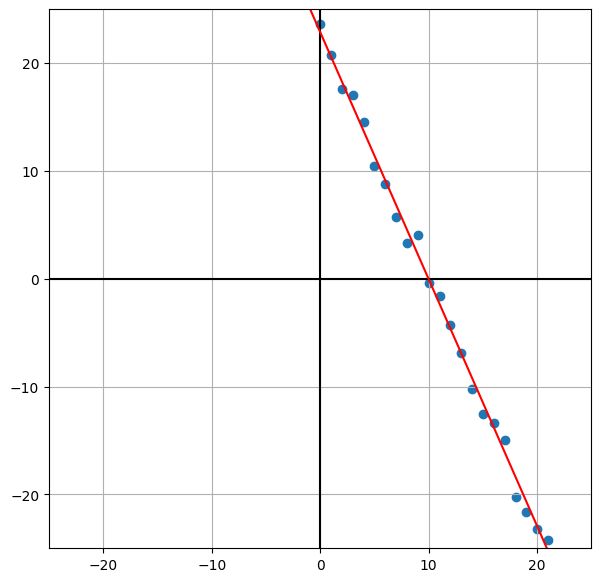

In [5]:
# постройте линию которая вышла рядом с изначальными данными


# изначальные данные
f, ax = plt.subplots(figsize=(7, 7))

plt.scatter(A[:, 0], y)
ax.set_xlim(-25, 25)
ax.set_ylim(-25, 25)
ax.axvline(0, color='black')
ax.axhline(0, color='black')
ax.grid(True)

# линия которая обучилась
# нужно вместо троеточий подсчитать значения y которые 
# получаются при полученных параметрах линии
# в точках x1 = -25, x2 = 25, этим мы построим линию по 2 точкам
y1 = a_b_analytical[0] * (-25) + a_b_analytical[1]
y2 = a_b_analytical[0] * 25 + a_b_analytical[1]
ax.plot([-25, 25], [y1, y2], color='red', label='Линия регрессии')

## 2. Решение с помощью градиентного спуска

С помощью найденных выше формул градиента, совершить шаги градиентного спуска для тех же данных.<br>
Подобрать значение $\alpha$, чтобы на графиках была видна сходимость за 10 шагов.<br> Начинаем с параметров 0, 0

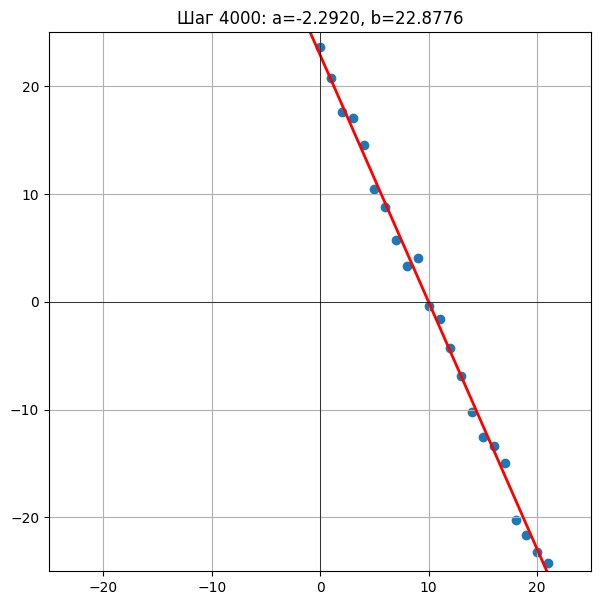

In [6]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

plt.ioff()
alpha = 0.0002

a_b_analytical = np.array([0.0, 0.0])

for i in range(4000):
    # Градиентный спуск
    grad = 2 * A.T @ (A @ a_b_analytical - y)
    a_b_analytical -= alpha * grad  
    
    # Визуализация
    if i % 25 == 0 or i == 3999:  
        clear_output(wait=True)  
        
        f, ax = plt.subplots(figsize=(7, 7))
        plt.scatter(A[:, 0], y)
        
        # Расчет линии
        x_line = np.array([-25, 25])
        y_line = a_b_analytical[0] * x_line + a_b_analytical[1]
        ax.plot(x_line, y_line, 'r-', linewidth=2)
        
        # Оформление графика
        ax.set_xlim(-25, 25)
        ax.set_ylim(-25, 25)
        ax.axhline(0, color='black', linewidth=0.5)
        ax.axvline(0, color='black', linewidth=0.5)
        ax.grid(True)
        ax.set_title(f'Шаг {i+1}: a={a_b_analytical[0]:.4f}, b={a_b_analytical[1]:.4f}')
        plt.show()

